In [12]:
from  JupyterDisplay import *
from  JupyterDisplay import JupyterDisplay as jd
import pandas as pd
import statsmodels.api as sm

In [13]:
DATASET_FOLDER_PATH = "../../datasets/airplane/"
DATASET_NAME = "AirPassengers.csv"

In [14]:
jd.checkFiles(DATASET_FOLDER_PATH)

AirPassengers.csv



In [15]:
df = pd.read_csv(DATASET_FOLDER_PATH+DATASET_NAME)
df['#Passengers'] =  df['#Passengers'].astype('float')

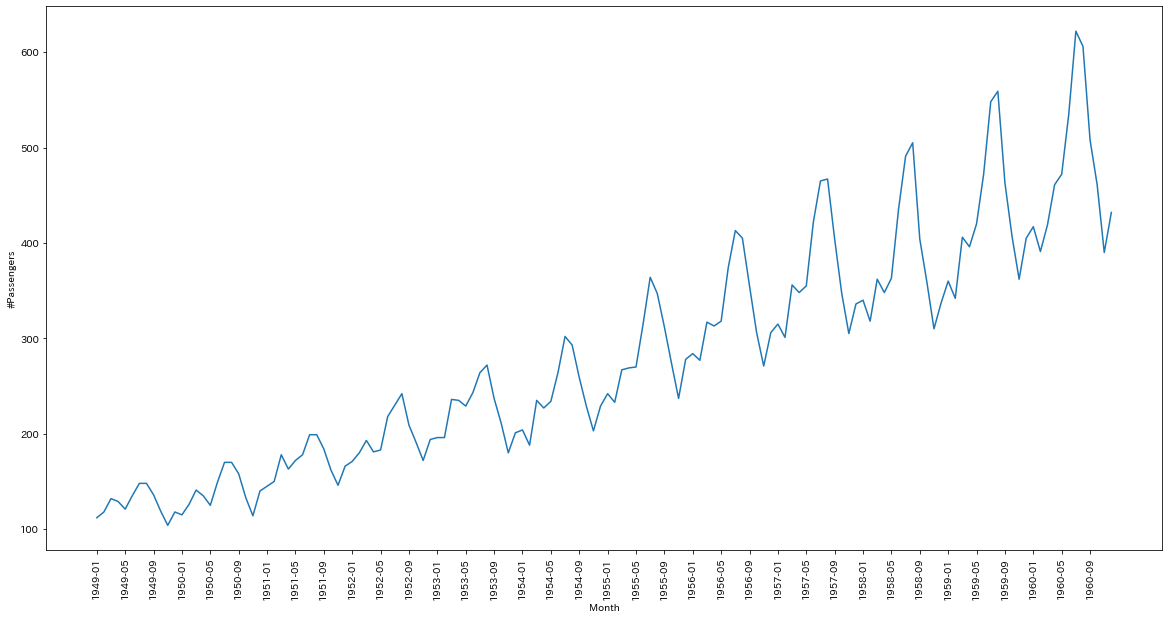

In [16]:
jd.defaultSize()
plt.xticks(df.index[::4],df.Month[::4])
sns.lineplot(x='Month',y='#Passengers',data=df)

In [17]:
df["tmp"] = df["#Passengers"].rolling(3).mean()

In [18]:
df["tmp2"] = df["#Passengers"].expanding(1).sum()

In [19]:
df["tmp3"] = df["#Passengers"].diff()

In [20]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(df["#Passengers"], nlags=40)

/Users/macico/.pyenv/versions/3.7.1/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [21]:
ts_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

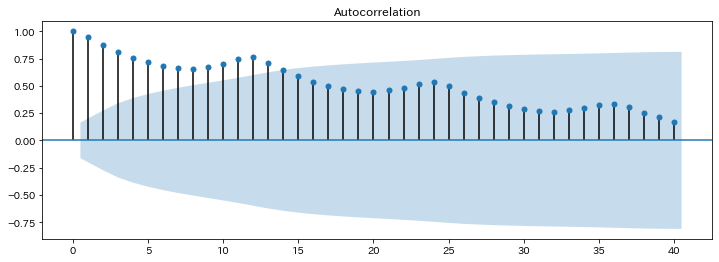

In [34]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(df["#Passengers"], lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

In [26]:
# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(df["#Passengers"], nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

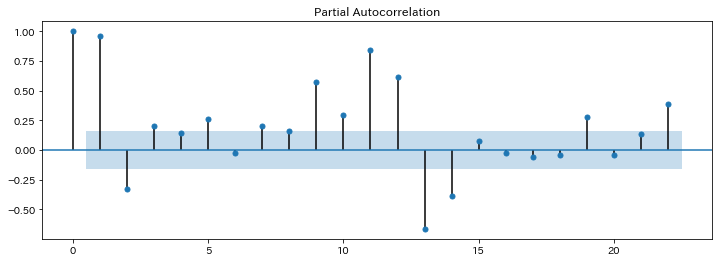

In [33]:
# 偏自己相関のグラフ自動作成
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(df["#Passengers"],method='ols', ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes
plt.show() # インライン表示で同じグラフが2個出でる？ので回避